## Part 1: Text Preprocessing and Exploration

Let's import the required libraries and load our dataset:

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from collections import Counter

# For text preprocessing
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.util import ngrams

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

# For dataset loading
from sklearn.datasets import fetch_20newsgroups

# Set random seed for reproducibility
np.random.seed(42)

# Load a subset of the 20 Newsgroups dataset
categories = ['comp.graphics', 'rec.autos', 'sci.space', 'talk.politics.misc']
newsgroups = fetch_20newsgroups(subset='train', categories=categories, random_state=42)

# Create a DataFrame for easier manipulation
df = pd.DataFrame({
    'text': newsgroups.data,
    'category': [newsgroups.target_names[target] for target in newsgroups.target]
})

# Preview the data
print(f"Dataset shape: {df.shape}")
print("\nCategory distribution:")
print(df['category'].value_counts())
print("\nSample document:")
print(df['text'][10][:500])  # Print first 500 characters of a sample document

/Users/faheemunnisasyeda/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/faheemunnisasyeda/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/faheemunnisasyeda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/faheemunnisasyeda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/faheemunnisasyeda/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package ave

Dataset shape: (2236, 2)

Category distribution:
category
rec.autos             594
sci.space             593
comp.graphics         584
talk.politics.misc    465
Name: count, dtype: int64

Sample document:
From: bob1@cos.com (Bob Blackshaw)
Subject: Re: Dumbest Driver Action
Organization: Corporation for Open Systems
Distribution: usa 
Lines: 41

In <C5Dq2n.5uB@news.cso.uiuc.edu> mwbg9715@uxa.cso.uiuc.edu (Mark Wayne Blunier) writes:

>jimf@centerline.com (Jim Frost) writes:

>>I wish I had the figures with me to back me up, but I recall
>>statistics showing that women tended to have more accidents than men
>>but the damage was generally quite minor.  Men had fewer but far more
>>expensive acciden


### Step 1: Basic Data Exploration
Let's examine the length characteristics of our documents:

Character count statistics:
count     2236.000000
mean      1918.330948
std       3850.168516
min        125.000000
25%        744.000000
50%       1157.500000
75%       1859.000000
max      60713.000000
Name: char_count, dtype: float64

Word count statistics:
count    2236.000000
mean      291.903846
std       584.403700
min        15.000000
25%       104.000000
50%       173.500000
75%       290.000000
max      9168.000000
Name: word_count, dtype: float64


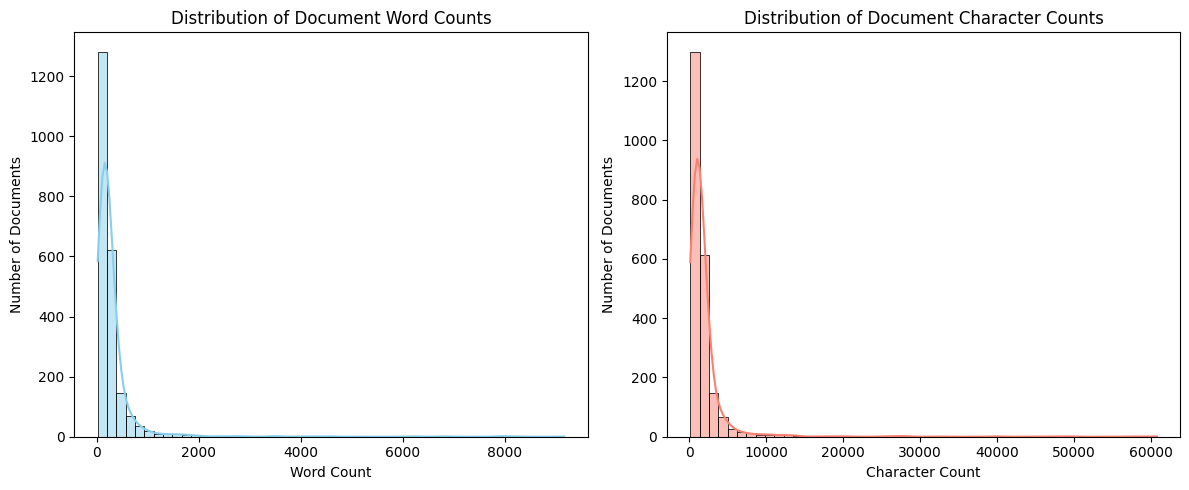

In [2]:
# Add a column for document length (number of characters)
df['char_count'] = df['text'].apply(len)

# Add a column for word count
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# Display basic statistics
print("Character count statistics:")
print(df['char_count'].describe())

print("\nWord count statistics:")
print(df['word_count'].describe())

# Visualize document lengths
plt.figure(figsize=(12,5))

# Histogram for word counts
plt.subplot(1,2,1)
sns.histplot(df['word_count'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Document Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Number of Documents')

# Histogram for character counts
plt.subplot(1,2,2)
sns.histplot(df['char_count'], bins=50, kde=True, color='salmon')
plt.title('Distribution of Document Character Counts')
plt.xlabel('Character Count')
plt.ylabel('Number of Documents')

plt.tight_layout()
plt.show()


### Step 2: Text Cleaning and Preprocessing Function
Let's create a comprehensive text preprocessing function that incorporates all the techniques we've learned:

In [3]:
# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Load stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text, do_stemming=False, do_lemmatization=True):
    """
    Preprocess input text by cleaning, tokenizing, removing stopwords,
    and optionally applying stemming or lemmatization.
    
    Parameters:
    - text (str): Raw text input
    - do_stemming (bool): Whether to apply stemming
    - do_lemmatization (bool): Whether to apply lemmatization
    
    Returns:
    - cleaned_text (str): Preprocessed text
    """
    # Lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # Apply stemming or lemmatization
    if do_stemming:
        tokens = [stemmer.stem(word) for word in tokens]
    elif do_lemmatization:
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back to string
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text


### Step 3: Apply Preprocessing and Analyze Results
Now let's apply our preprocessing function to the dataset and examine the results:

Original (comp.graphics):
From: nfotis@ntua.gr (Nick C. Fotis)
Subject: Re: more on radiosity
Organization: National Technical University of Athens
Lines: 34

amann@iam.unibe.ch (Stephan Amann) writes:

>In article 66319@yuma....

Cleaned:
nick c fotis subject radiosity organization national technical university athens line stephan amann writes article xia zhao writes article write let serious im working radiosity package written c woul...

--------------------------------------------------------------------------------
Original (talk.politics.misc):
From: cdm@pmafire.inel.gov (Dale Cook)
Subject: Re: Good Neighbor Political Hypocrisy Test
Organization: WINCO
Lines: 25

In article <1993Apr15.193603.14228@magnus.acs.ohio-state.edu> rscharfy@magnus....

Cleaned:
dale cook subject good neighbor political hypocrisy test organization winco line article ryan c scharfy writes article steve thomas wri te try justify war drug dare friend mine smoke pot every day las...

------------------------

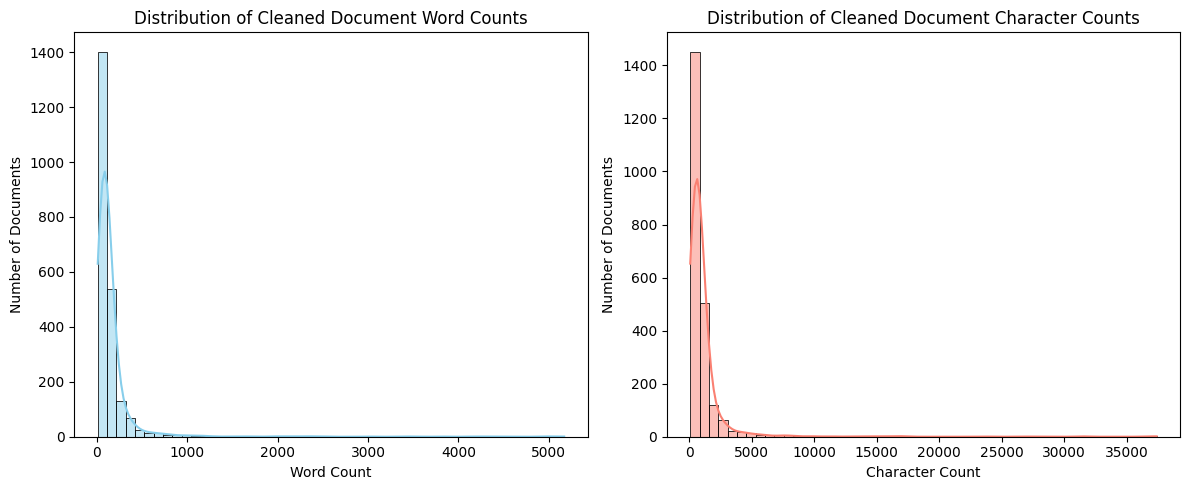

In [4]:
# Apply preprocessing to the 'text' column
df['cleaned_text'] = df['text'].apply(lambda x: preprocess_text(x))

# Preview the original vs cleaned text
for i in range(3):
    print(f"Original ({df['category'][i]}):\n{df['text'][i][:200]}...\n")
    print(f"Cleaned:\n{df['cleaned_text'][i][:200]}...\n")
    print("-"*80)

# Basic analysis: document length after cleaning
df['cleaned_word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))
df['cleaned_char_count'] = df['cleaned_text'].apply(len)

print("Cleaned word count statistics:")
print(df['cleaned_word_count'].describe())

print("\nCleaned character count statistics:")
print(df['cleaned_char_count'].describe())

# Visualize cleaned document lengths
plt.figure(figsize=(12,5))

# Histogram for cleaned word counts
plt.subplot(1,2,1)
sns.histplot(df['cleaned_word_count'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Cleaned Document Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Number of Documents')

# Histogram for cleaned character counts
plt.subplot(1,2,2)
sns.histplot(df['cleaned_char_count'], bins=50, kde=True, color='salmon')
plt.title('Distribution of Cleaned Document Character Counts')
plt.xlabel('Character Count')
plt.ylabel('Number of Documents')

plt.tight_layout()
plt.show()

### Step 4: Token Frequency Analysis
Let's analyze the most common words in each category after preprocessing:

In [5]:
from collections import Counter

# Function to get top N words for a given category
def get_top_words(df, category, n=10):
    # Combine all cleaned text in the category
    cat_text = ' '.join(df[df['category'] == category]['cleaned_text'])
    # Split into words
    words = cat_text.split()
    # Count frequencies
    word_freq = Counter(words)
    # Return top N
    return word_freq.most_common(n)

# Analyze top words for each category
for category in df['category'].unique():
    top_words = get_top_words(df, category, n=10)
    print(f"Top 10 words in category '{category}':")
    for word, freq in top_words:
        print(f"{word}: {freq}")
    print("-"*50)

Top 10 words in category 'comp.graphics':
line: 774
image: 758
subject: 627
organization: 581
file: 554
graphic: 460
university: 360
program: 329
would: 295
x: 279
--------------------------------------------------
Top 10 words in category 'talk.politics.misc':
would: 692
people: 684
writes: 611
q: 575
article: 573
line: 525
one: 515
dont: 508
organization: 506
subject: 500
--------------------------------------------------
Top 10 words in category 'sci.space':
space: 1200
line: 646
subject: 635
organization: 631
would: 553
writes: 452
one: 413
nasa: 407
article: 402
launch: 377
--------------------------------------------------
Top 10 words in category 'rec.autos':
car: 1223
line: 642
subject: 625
organization: 589
writes: 484
article: 453
would: 430
one: 362
like: 327
dont: 322
--------------------------------------------------


/var/folders/2x/x881t5116gvcv99x57d0tz240000gn/T/ipykernel_75936/2708362097.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")
/var/folders/2x/x881t5116gvcv99x57d0tz240000gn/T/ipykernel_75936/2708362097.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")
/var/folders/2x/x881t5116gvcv99x57d0tz240000gn/T/ipykernel_75936/2708362097.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")
/var/folders/

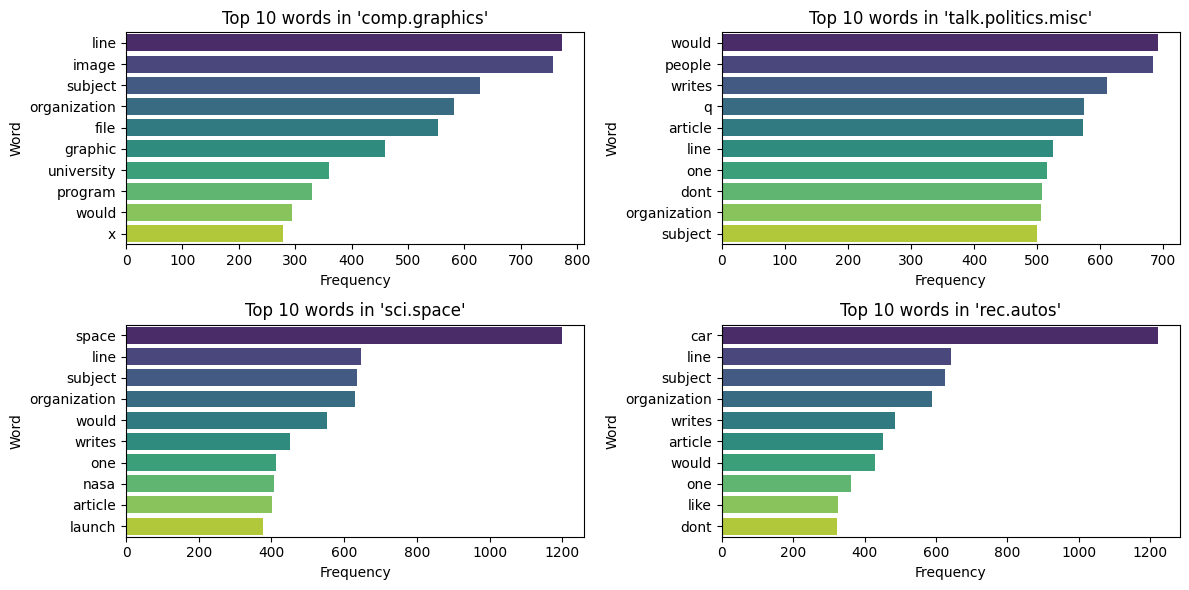

In [6]:
plt.figure(figsize=(12,6))

for i, category in enumerate(df['category'].unique()):
    plt.subplot(2, 2, i+1)
    top_words = get_top_words(df, category, n=10)
    words, counts = zip(*top_words)
    sns.barplot(x=list(counts), y=list(words), palette="viridis")
    plt.title(f"Top 10 words in '{category}'")
    plt.xlabel("Frequency")
    plt.ylabel("Word")

plt.tight_layout()
plt.show()

### Step 5: N-gram Analysis
Let's go beyond single words and look at common bigrams and trigrams:

In [7]:
def get_top_ngrams(df, category, ngram_range=(2,2), n=10):
    """
    ngram_range: (min_n, max_n), e.g., (2,2) for bigrams, (3,3) for trigrams
    """
    # Combine all cleaned text in the category
    cat_text = ' '.join(df[df['category'] == category]['cleaned_text'])
    tokens = cat_text.split()
    
    # Generate n-grams
    n_grams = list(ngrams(tokens, ngram_range[0]))
    
    # Count frequencies
    ngram_freq = Counter(n_grams)
    
    # Return top N
    return ngram_freq.most_common(n)

# Analyze top bigrams and trigrams for each category
for category in df['category'].unique():
    print(f"Category: {category}\n")
    
    top_bigrams = get_top_ngrams(df, category, ngram_range=(2,2), n=10)
    print("Top 10 Bigrams:")
    for grams, freq in top_bigrams:
        print(f"{' '.join(grams)}: {freq}")
    
    top_trigrams = get_top_ngrams(df, category, ngram_range=(3,3), n=10)
    print("\nTop 10 Trigrams:")
    for grams, freq in top_trigrams:
        print(f"{' '.join(grams)}: {freq}")
    
    print("-"*50)


Category: comp.graphics

Top 10 Bigrams:
organization university: 111
line nntppostinghost: 104
line article: 88
distribution world: 69
line distribution: 58
image processing: 57
computer graphic: 55
xnewsreader tin: 52
would like: 51
anyone know: 50

Top 10 Trigrams:
line distribution world: 51
distribution world nntppostinghost: 42
xnewsreader tin version: 40
tin version pl: 39
fast polygon routine: 20
version pl line: 19
subject tiff philosophical: 18
tiff philosophical significance: 18
distribution world organization: 17
would greatly appreciated: 17
--------------------------------------------------
Category: talk.politics.misc

Top 10 Bigrams:
mr stephanopoulos: 341
line article: 191
writes article: 189
m myers: 117
health care: 99
united state: 97
dont know: 95
line nntppostinghost: 83
clayton cramer: 80
organization university: 74

Top 10 Trigrams:
senior administration official: 51
mr stephanopoulos dont: 49
ca line article: 44
clayton cramer writes: 43
gary l dare: 35
clayton

/var/folders/2x/x881t5116gvcv99x57d0tz240000gn/T/ipykernel_75936/371346803.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=ngrams_str, palette="magma")
/var/folders/2x/x881t5116gvcv99x57d0tz240000gn/T/ipykernel_75936/371346803.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=ngrams_str, palette="magma")
/var/folders/2x/x881t5116gvcv99x57d0tz240000gn/T/ipykernel_75936/371346803.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=ngrams_str, palette="magma")
/var/folders/2x/x881t5116gvcv99x57d0tz24000

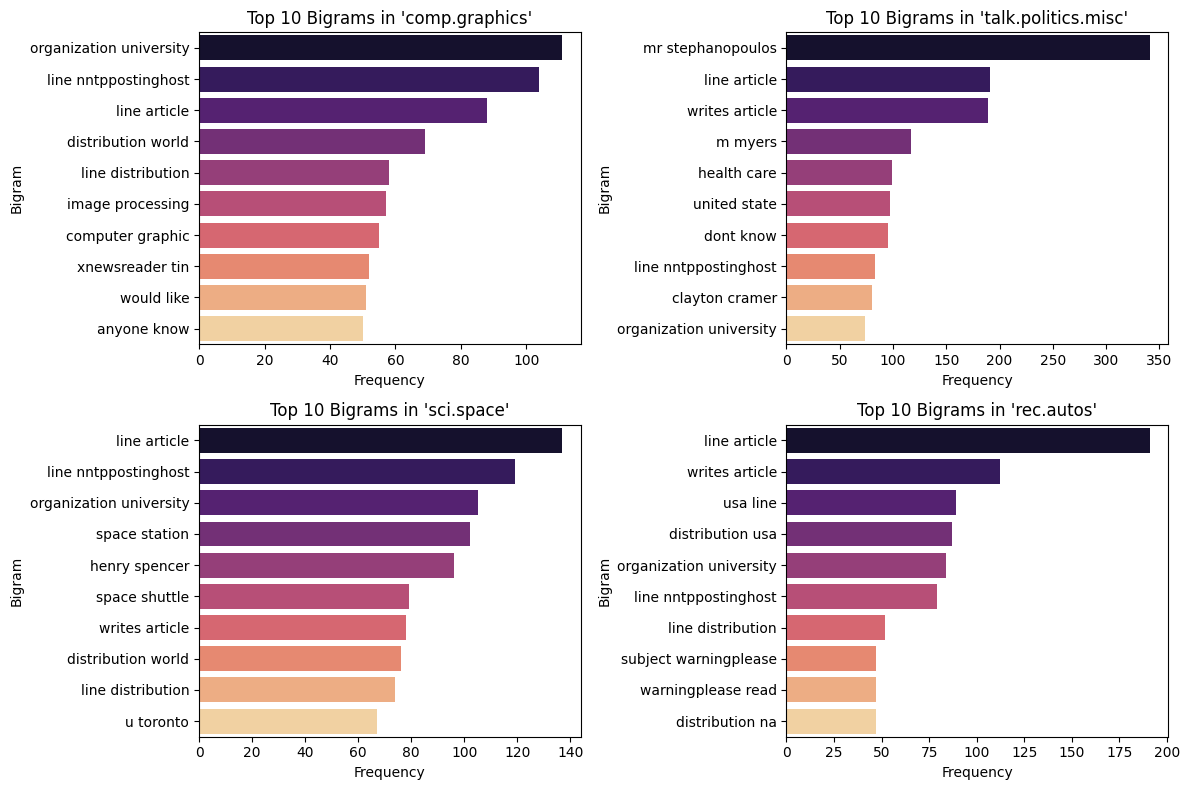

In [8]:
plt.figure(figsize=(12,8))

for i, category in enumerate(df['category'].unique()):
    plt.subplot(2, 2, i+1)
    top_bigrams = get_top_ngrams(df, category, ngram_range=(2,2), n=10)
    ngrams_str = [' '.join(grams) for grams, _ in top_bigrams]
    counts = [freq for _, freq in top_bigrams]
    
    sns.barplot(x=counts, y=ngrams_str, palette="magma")
    plt.title(f"Top 10 Bigrams in '{category}'")
    plt.xlabel("Frequency")
    plt.ylabel("Bigram")

plt.tight_layout()
plt.show()


## Part 2: Time Series Analysis and Modeling

### Step 1: Data Loading and Initial Exploration
First, let's load the S&P 500 historical data and perform initial exploration.

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ^GSPC: No timezone found, symbol may be delisted
S&P 500 Dataset:
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []

Dataset information:
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       0 non-null      float64
 1   High       0 non-null      float64
 2   Low        0 non-null      float64
 3   Close      0 non-null      float64
 4   Adj Close  0 non-null      float64
 5   Volume     0 non-null      float64
dtypes: float64(6)
memory usage: 0.0+ bytes
None

Summary Statistics:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

Missing values in each column:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int6

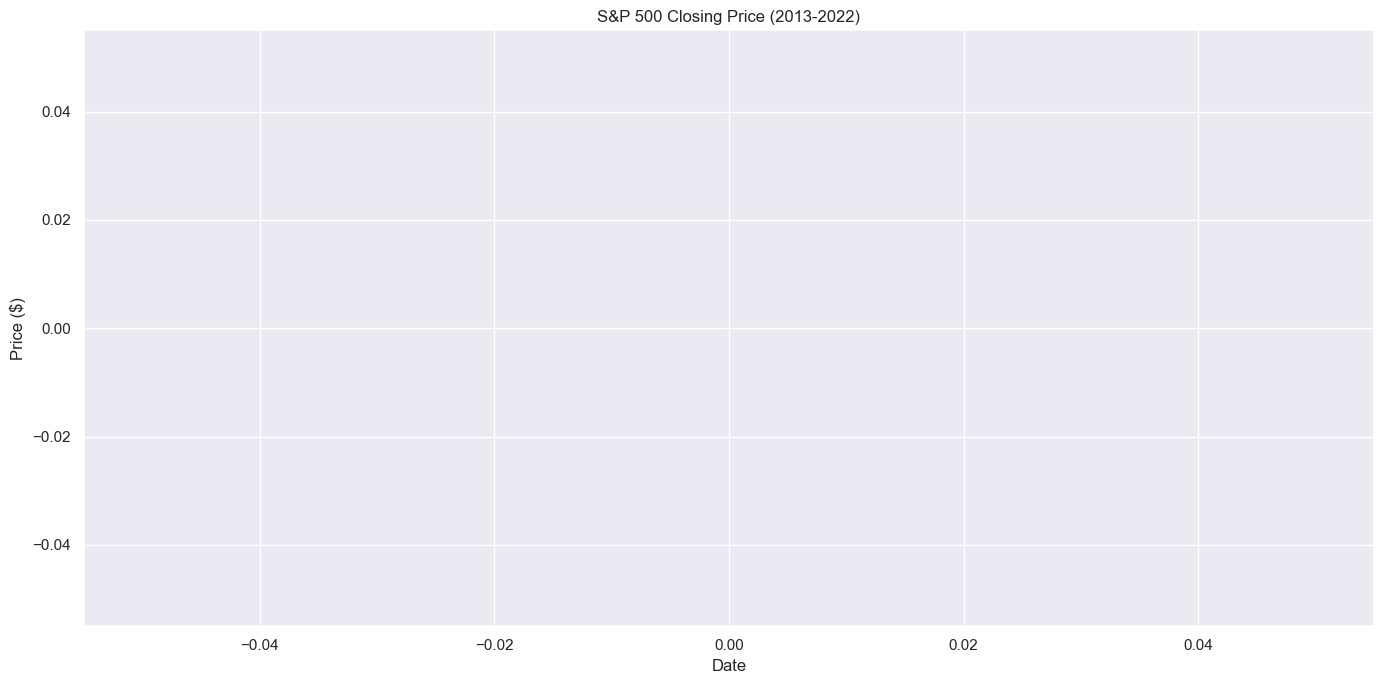


Selected time series shape: (0,)


In [9]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import yfinance as yf
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_theme()

# Download S&P 500 data for the last 10 years
sp500 = yf.download('^GSPC', start='2013-01-01', end='2022-12-31')

# Display the first few rows of the dataset
print("S&P 500 Dataset:")
print(sp500.head())

# Display basic information about the dataset
print("\nDataset information:")
print(sp500.info())

# Calculate basic summary statistics
print("\nSummary Statistics:")
print(sp500['Close'].describe())

# Check for missing values
print("\nMissing values in each column:")
print(sp500.isnull().sum())

# Plot the closing price
plt.figure(figsize=(14, 7))
plt.plot(sp500.index, sp500['Close'])
plt.title('S&P 500 Closing Price (2013-2022)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Select the closing price as our primary time series for analysis
ts_data = sp500['Close']
print("\nSelected time series shape:", ts_data.shape)

### Step 2: Time Series Characteristics and Visualization
Let's analyze the characteristics of the time series through various visualizations.

### Step 3: Stationarity Testing and Transformation
Now, let's test for stationarity using the Dickey-Fuller test and apply transformations to make the data stationary.

### Step 4: Time Series Decomposition
Let's decompose our time series into trend, seasonal, and residual components.

### Step 5: Autocorrelation Analysis
Now, let's analyze the autocorrelation structure of our stationary series.

### Step 6: Time Series Modeling
Finally, let's build and evaluate time series models based on our analysis.

## Part 3: Neural Networks Implementation and Optimization

### Step 1: Load libraries and prepare the datasets

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report
from sklearn.datasets import load_digits

# For deep learning
import tensorflow as tf
from tensorflow import keras
from keras import layers

# For PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
torch.manual_seed(42)

# Load Digits dataset for classification
digits = load_digits()
X_digits = digits.data
y_digits = digits.target


# Display sample digits
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f'Digit: {digits.target[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Print information about dataset
print(f"Digits dataset: {X_digits.shape[0]} samples, {X_digits.shape[1]} features")

### Step 2: Preprocess data for neural networks

### Step 3: Build a basic MLP for digits classification using TensorFlow/Keras

### Step 4: Implement the digits classification model in PyTorch

### Step 5: Experiment with different activation functions (TensorFlow)